In [8]:
import pandas as pnd
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
dfs = pd.read_csv("Corona_NLP_test.csv", encoding='latin1')
dfs['preprocessed_data'] = dfs['OriginalTweet'].apply(lambda x: re.sub(r'http\S+|www\S+|@\S+|[^\w\s]+', '', x))
# Tokenize the text data
dfs['tokens'] = dfs['preprocessed_data'].apply(lambda x: word_tokenize(x.lower()))
print(dfs.head())
     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   

                                   preprocessed_data  \
0  TRENDING New Yorkers encounter empty supermark...   
1  When I couldnt find hand sanitizer at Fred Mey...   
2  Find out ho

In [10]:
from nltk.corpus import stopwords as sw
nltk.download('sw')
stop_words_1 = set(sw.words('english'))
# Remove the stop words
dfs['tokens'] = dfs['tokens'].apply(lambda x: [word for word in x if word not in stop_words_1])
print(dfs.head())

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   

                                   preprocessed_data  \
0  TRENDING New Yorkers encounter empty supermark...   
1  When I couldnt find hand sanitizer at Fred Mey...   
2  Find out ho

[nltk_data] Error loading sw: Package 'sw' not found in index


In [11]:

from collections import Counter
word_freq_1 = Counter([word for tokens in dfs["tokens"] for word in tokens])
print(word_freq_1.most_common(10))

[('covid_19', 1525), ('coronavirus', 1503), ('food', 1327), ('store', 1008), ('covid19', 962), ('grocery', 815), ('stock', 778), ('people', 774), ('amp', 575), ('shopping', 522)]


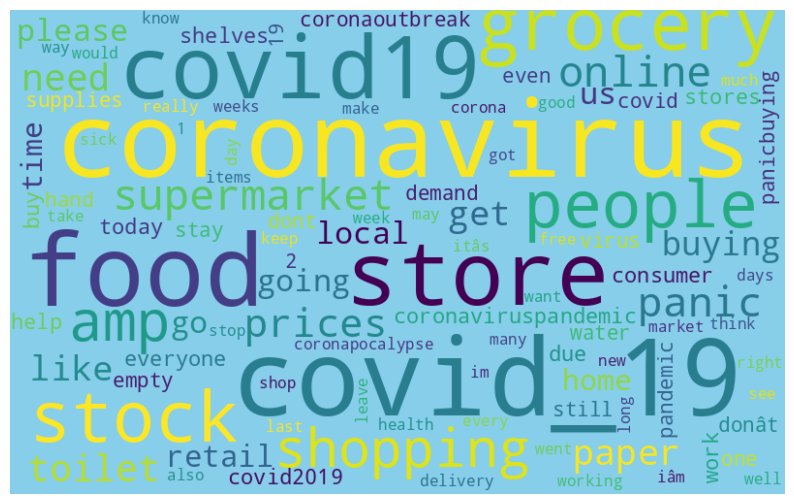

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create word cloud
wordcloud_a = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='skyblue', max_words=100).generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_a, interpolation="bilinear")
plt.axis('off')
plt.show()
     